In [6]:
# Use 'fbpinns' kernel to run this notebookS
 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ast
import matplotlib.gridspec as gridspec
from scipy.interpolate import griddata
import tikzplotlib

import sys
sys.path.append('../../FBPINNs')
from FBPINNsModel.plot import plot_loss_landscape_contour_with_limit

%matplotlib inline

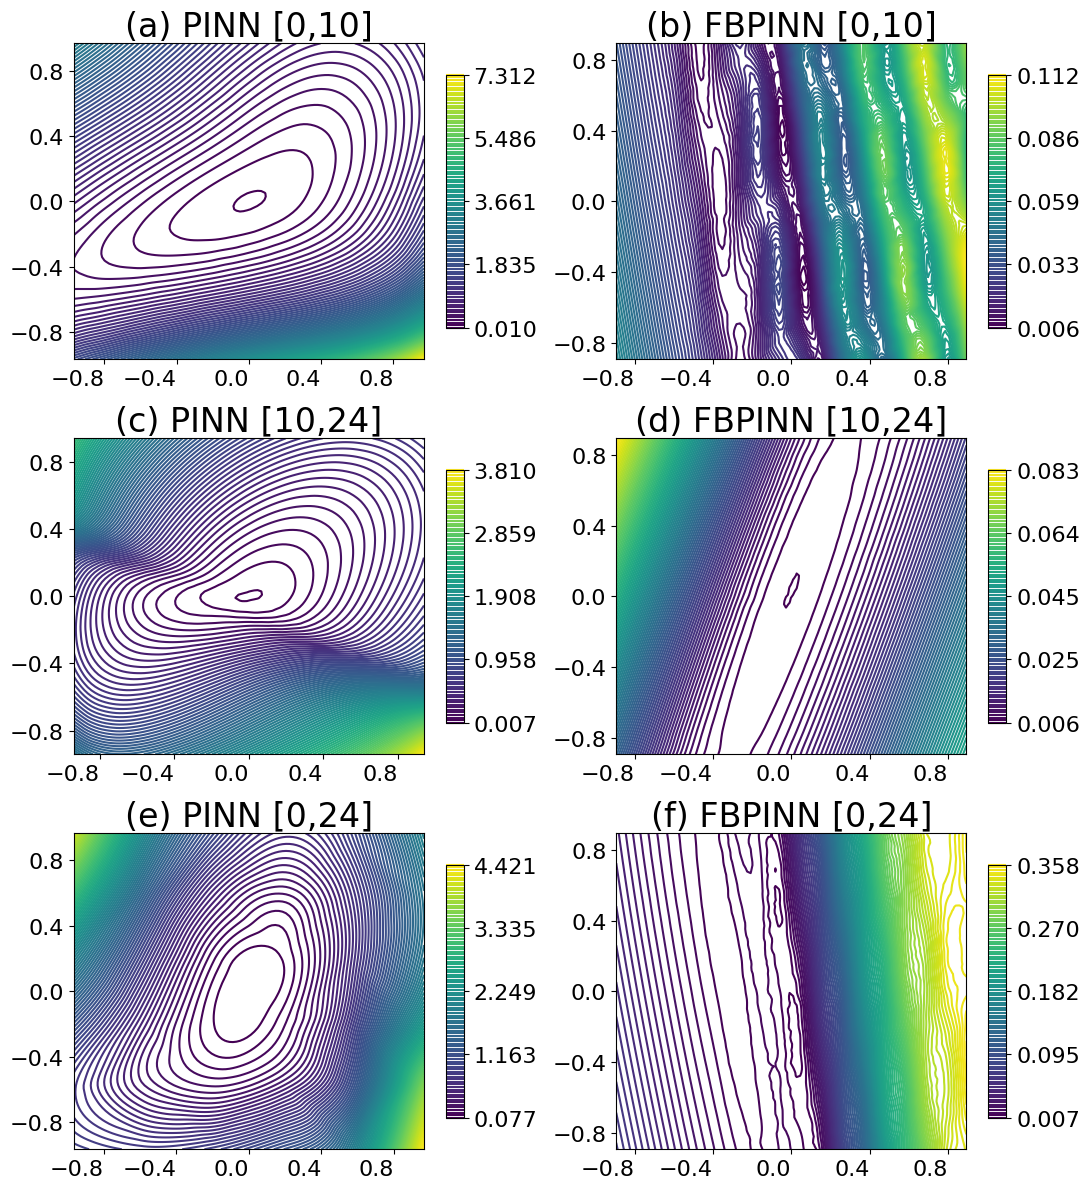

In [7]:
time_limits = [[0,10], [10,24], [0,24]]

fig, axs = plt.subplots(3, 2, figsize=(11, 12))

sciann_limit = 1
fbpinn_limit = 1


title_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for tl in time_limits:

    sciann_path = f'coexistence_sciann/SciANN_CM_coexistence_actf_tanh_l_5x5x5_nD_100_bs_300_e_50000_lr_0.001_tl_{tl[0]}-{tl[1]}_nl_0.05_nC_200_nT_500_/loss-landscape-history-landscape.csv'
    fbpinn_path = f'coexistence/summaries/FBPINN_coexistence_{tl[0]}_{tl[1]}/loss-landscape.csv'

    ax1 = axs[time_limits.index(tl)][0]
    ax2 = axs[time_limits.index(tl)][1]
    plot_loss_landscape_contour_with_limit(sciann_path, ax1, f'{title_labels[time_limits.index(tl)*2]} PINN [{tl[0]},{tl[1]}]', sciann_limit)
    plot_loss_landscape_contour_with_limit(fbpinn_path, ax2, f'{title_labels[time_limits.index(tl)*2+1]} FBPINN [{tl[0]},{tl[1]}]', fbpinn_limit)


plt.tight_layout()
tikzplotlib.save("coexistence_loss_landscape.tex")
plt.savefig("loss_landscape_coexistence_new.png")
